# Bibliotecas

In [14]:
#!pip install geopy

In [15]:
#!pip install geocoder

In [1]:
# ETL - EDA

import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

# Correção Latilon

from geopy.exc import GeocoderTimedOut 
from geopy.geocoders import Nominatim 
import geocoder

In [17]:
df=pd.read_csv('df_17_20.csv')

In [18]:
df['causa_acidente'].unique()

array(['Fenômenos da Natureza', 'Falta de Atenção à Condução',
       'Animais na Pista', 'Avarias e/ou desgaste excessivo no pneu',
       'Ingestão de Álcool', 'Defeito Mecânico no Veículo',
       'Desobediência às normas de trânsito pelo condutor',
       'Velocidade Incompatível', 'Restrição de Visibilidade',
       'Falta de Atenção do Pedestre', 'Condutor Dormindo',
       'Pista Escorregadia', 'Não guardar distância de segurança',
       'Ultrapassagem Indevida', 'Defeito na Via',
       'Sinalização da via insuficiente ou inadequada', 'Mal Súbito',
       'Carga excessiva e/ou mal acondicionada',
       'Objeto estático sobre o leito carroçável',
       'Deficiência ou não Acionamento do Sistema de Iluminação/Sinalização do Veículo',
       'Ingestão de Substâncias Psicoativas', 'Agressão Externa',
       'Desobediência às normas de trânsito pelo pedestre',
       'Ingestão de álcool e/ou substâncias psicoativas pelo pedestre'],
      dtype=object)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635853 entries, 0 to 635852
Data columns (total 36 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      635853 non-null  int64  
 1   pesid                   635849 non-null  float64
 2   data_inversa            635853 non-null  object 
 3   dia_semana              635853 non-null  object 
 4   horario                 635853 non-null  object 
 5   uf                      635853 non-null  object 
 6   br                      634766 non-null  float64
 7   km                      634766 non-null  float64
 8   municipio               635853 non-null  object 
 9   causa_acidente          635853 non-null  object 
 10  tipo_acidente           635853 non-null  object 
 11  classificacao_acidente  635853 non-null  object 
 12  fase_dia                635853 non-null  object 
 13  sentido_via             635853 non-null  object 
 14  condicao_metereologi

In [7]:
pd.set_option('max_columns', None)
df.sample(5)

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop,ano
117947,58880,126966.0,2017-08-01,terça-feira,18:10:00,PR,277.0,81.8,CURITIBA,Falta de Atenção à Condução,Colisão lateral,Com Vítimas Feridas,Anoitecer,Crescente,Céu Claro,Dupla,Reta,Sim,104129.0,Motocicleta,HONDA/CB 300R,2015.0,Condutor,Lesões Leves,67.0,Masculino,0,1,0,0,-25.461720,-49.219050,SR-PR,DEL7/1,UOP01/PR,2017
176857,88200,191863.0,2017-11-22,quarta-feira,06:00:00,PR,476.0,197.7,LAPA,Falta de Atenção à Condução,Tombamento,Sem Vítimas,Pleno dia,Crescente,Céu Claro,Simples,Rotatória,Sim,156752.0,Caminhão,VW/23.220,2005.0,Condutor,Ileso,32.0,Masculino,1,0,0,0,-25.763240,-49.737130,SR-PR,DEL7/1,UOP04/PR,2017
35150,17280,41279.0,2017-03-05,domingo,16:00:00,BA,116.0,388.0,SANTA BARBARA,Desobediência às normas de trânsito pelo condutor,Colisão lateral,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Reta,Não,30083.0,Caminhonete,FIAT/STRADA WORKING CD,2015.0,Condutor,Ileso,28.0,Masculino,1,0,0,0,-11.920136,-38.983197,SR-BA,DEL10/2,UOP02/BA,2017
388827,246896,549578.0,2019-11-03,domingo,06:00:00,RS,101.0,82.0,OSORIO,Falta de Atenção à Condução,Saída de leito carroçável,Sem Vítimas,Amanhecer,Crescente,Céu Claro,Dupla,Reta,Não,440552.0,Caminhão-trator,IVECO/STRALIS 600S44T,2013.0,Condutor,Ileso,39.0,Masculino,1,0,0,0,-29.843225,-50.245589,SR-RS,DEL9/3,UOP01/RS,2019
593272,286037,637192.0,2020-05-23,sábado,23:00:00,RO,364.0,708.0,PORTO VELHO,Ingestão de Álcool,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Múltipla,Reta,Não,510791.0,Automóvel,GM/CELTA 4P SPIRIT,2010.0,Condutor,Lesões Leves,21.0,Masculino,0,1,0,0,-8.795541,-63.840725,SR-RO,UOP01,DEL01,2020


In [8]:
df.isnull().sum()

id                            0
pesid                         4
data_inversa                  0
dia_semana                    0
horario                       0
uf                            0
br                         1087
km                         1087
municipio                     0
causa_acidente                0
tipo_acidente                 0
classificacao_acidente        0
fase_dia                      0
sentido_via                   0
condicao_metereologica        0
tipo_pista                    0
tracado_via                   0
uso_solo                      0
id_veiculo                    4
tipo_veiculo                  0
marca                     31077
ano_fabricacao_veiculo    36485
tipo_envolvido                0
estado_fisico                 0
idade                     58938
sexo                          0
ilesos                        0
feridos_leves                 0
feridos_graves                0
mortos                        0
latitude                      0
longitud

<AxesSubplot:>

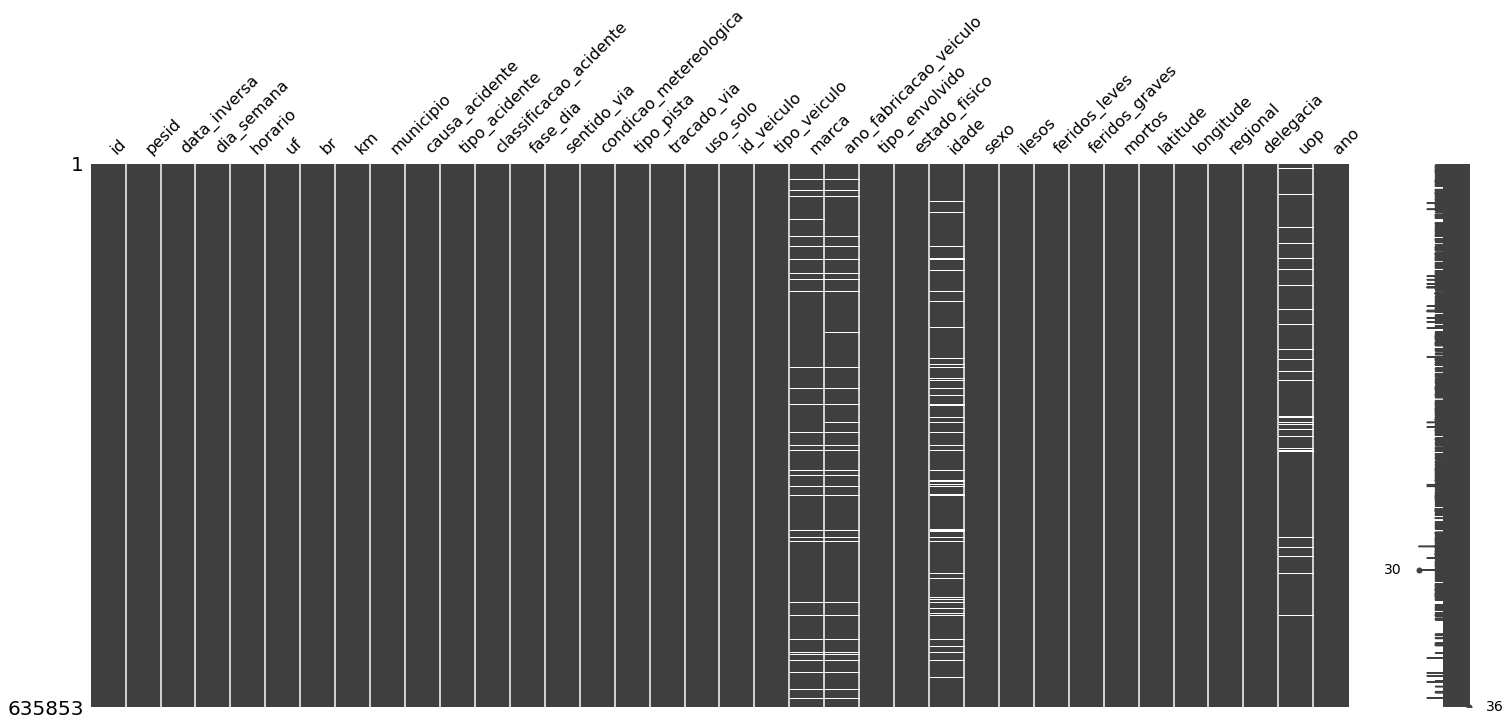

In [9]:
msno.matrix(df)

# Analisando a Coerência dos Valores de Latitude e Longitude

In [10]:
df20=df.loc[df['ano']==2020,['longitude','latitude']]
df20[['longitude','latitude']].describe()

,longitude,latitude
count,104383.000000,104383.000000
mean,-46.649073,-18.553720
std,6.272491,7.808494
min,-70.521811,-33.706076
25%,-50.276633,-25.098328
50%,-47.725159,-20.157233
75%,-42.387228,-12.381000
max,-34.793181,4.442535


## 2020

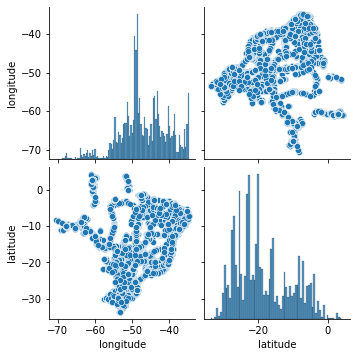

In [11]:
sns.pairplot(df.loc[df['ano']==2020,['longitude','latitude']])

### 2019

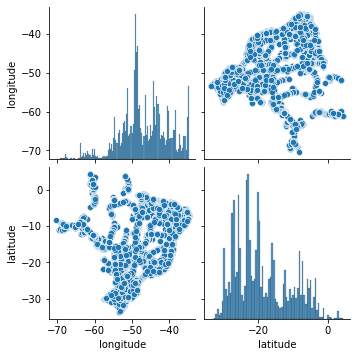

In [12]:
df19=df.loc[df['ano']==2019,['longitude','latitude']]
sns.pairplot(df.loc[df['ano']==2019,['longitude','latitude']])

In [13]:
df19[['longitude','latitude']].describe()

,longitude,latitude
count,162273.000000,162273.000000
mean,-46.615378,-18.808970
std,6.247714,7.773716
min,-70.345631,-33.689819
25%,-50.281799,-25.349960
50%,-47.672625,-20.340075
75%,-42.383219,-12.720038
max,-34.814987,4.460678


### 2018

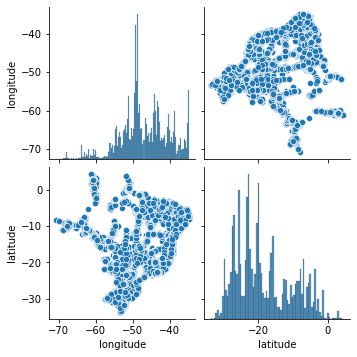

In [14]:
df18=df.loc[df['ano']==2018,['longitude','latitude']]
sns.pairplot(df.loc[df['ano']==2018,['longitude','latitude']])

In [15]:
df18[['longitude','latitude']].describe()

,longitude,latitude
count,164802.000000,164802.000000
mean,-46.673881,-18.532388
std,6.248499,7.926339
min,-70.744728,-33.689819
25%,-50.276989,-25.124722
50%,-47.721241,-20.246741
75%,-42.634204,-12.301788
max,-34.827690,4.428241


### 2017

In [16]:
df17=df.loc[df['ano']==2017,['longitude','latitude']]
df17.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204395 entries, 0 to 204394
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   longitude  204395 non-null  float64
 1   latitude   204395 non-null  float64
dtypes: float64(2)
memory usage: 4.7 MB


<AxesSubplot:xlabel='longitude'>

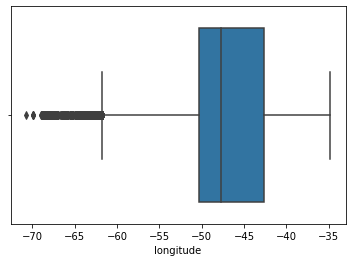

In [17]:
sns.boxplot(data=df18, x='longitude') # +- 180º

<AxesSubplot:xlabel='latitude'>

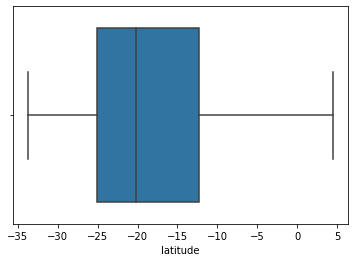

In [18]:
sns.boxplot(data=df18, x='latitude') # +- 90ºC

## Conclusão:

O Ano de 2017 apresenta dados discrepantes, uma vez que estamos falando de dados de acidentes no Brasil, podemos verificar que este ano foge da zona maxima de latilon, 
ao contrário de 2017 os outros anos apresentam dados consistentes.

### Criando variável df17 com DataFrame que tem dados apenas de 2017
df17 é um recorte do df completo

In [34]:
# Criando variável df17 com DataFrame que tem dados apenas de 2017
# df17 é um recorte do df completo contendo apenas as partes que serão utilizadas


df17=df.loc[df['ano']==2017,['uf','br','km','municipio','longitude','latitude']]

#sns.pairplot(df.loc[df['ano']==2017,['longitude','latitude']])

Tratando os dados de latitude e longitude baseado no ano de 2017

In [35]:
df17.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204395 entries, 0 to 204394
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   uf         204395 non-null  object 
 1   br         204071 non-null  float64
 2   km         204071 non-null  float64
 3   municipio  204395 non-null  object 
 4   longitude  204395 non-null  float64
 5   latitude   204395 non-null  float64
dtypes: float64(4), object(2)
memory usage: 10.9+ MB


<AxesSubplot:xlabel='longitude'>

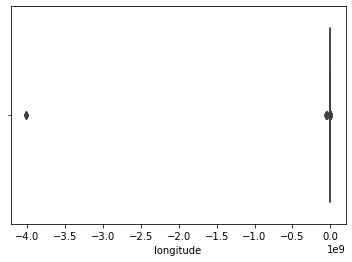

In [36]:
sns.boxplot(data=df17, x='longitude') # +- 180º

<AxesSubplot:xlabel='latitude'>

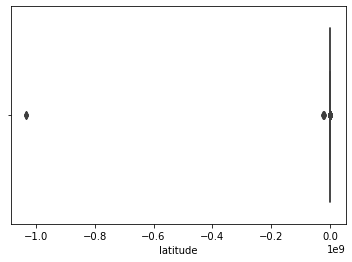

In [37]:
sns.boxplot(data=df17, x='latitude') # +- 90º

### Fazendo um filtro do Data Frame dentro do ano de 2017 que contém longitude ou latitude c/ problema;

In [43]:
df_problema_17 = df17[(df17['longitude']>-35)|(df17['longitude']<-71)|(df17['latitude']>5)|(df17['latitude']<-34)]
df_problema_17.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4935 entries, 2 to 204126
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   uf         4935 non-null   object 
 1   br         4931 non-null   float64
 2   km         4931 non-null   float64
 3   municipio  4935 non-null   object 
 4   longitude  4935 non-null   float64
 5   latitude   4935 non-null   float64
dtypes: float64(4), object(2)
memory usage: 269.9+ KB


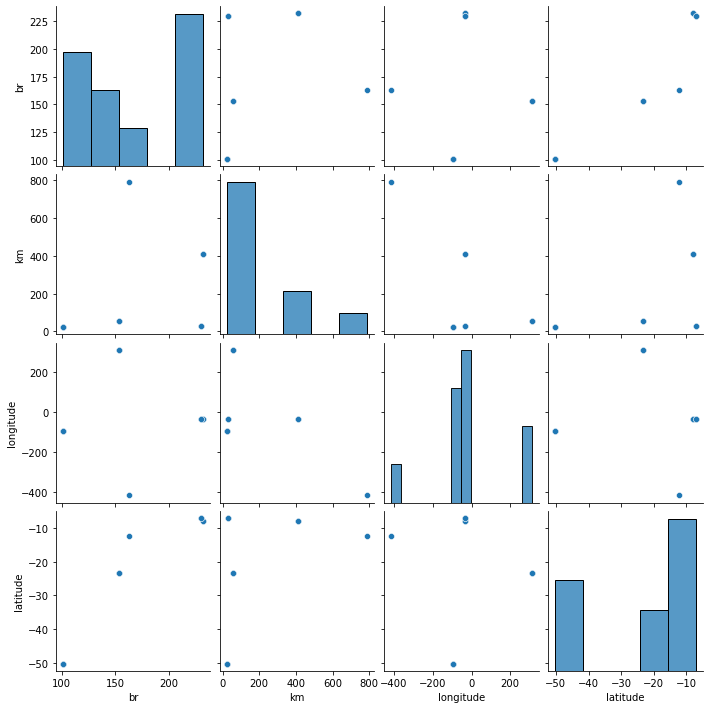

In [39]:
df_problema_17.head(10)
sns.pairplot(df_problema_17.head(10))

## Tratamento dos Dados incosistentes de Latilon

#### Fomato a ser utilizado 'BR-101, Km 51 - Timbó, Abreu e Lima - PE'

Criando coluna contendo endereço para posterior busca no API, respeitando o formato acim que se mostrou mais acertivo

In [40]:
df_problema_17['endereco'] = ' BR-' + df_problema_17['br'].astype(str) + ', ' + ' Km ' + df_problema_17['km'].astype(str) + '-' + df_problema_17['municipio'] + '-' + df_problema_17['uf']

<ipython-input-40-04766bd6e5a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_problema_17['endereco'] = ' BR-' + df_problema_17['br'].astype(str) + ', ' + ' Km ' + df_problema_17['km'].astype(str) + '-' + df_problema_17['municipio'] + '-' + df_problema_17['uf']


#### Importante que o df_problema_17 contem os indexes vindos do recorte principal

In [41]:
df_problema_17.sample(10)

,uf,br,km,municipio,longitude,latitude,endereco
106321,PE,101.0,69.2,RECIFE,-34.944820,-8.061727,"BR-101.0, Km 69.2-RECIFE-PE"
159911,PE,101.0,70.8,RECIFE,-34.945750,-8.074834,"BR-101.0, Km 70.8-RECIFE-PE"
187217,PE,101.0,51.5,PAULISTA,-34.897450,-7.919599,"BR-101.0, Km 51.5-PAULISTA-PE"
135402,PE,101.0,52.5,ABREU E LIMA,-34.899100,-7.928050,"BR-101.0, Km 52.5-ABREU E LIMA-PE"
41242,PE,101.0,76.8,JABOATAO DOS GUARARAPES,-34.947142,-8.138932,"BR-101.0, Km 76.8-JABOATAO DOS GUARARAPES-PE"
45951,PB,101.0,89.5,JOAO PESSOA,-34.898250,-7.171451,"BR-101.0, Km 89.5-JOAO PESSOA-PB"
53137,PB,230.0,11.0,CABEDELO,-34.850049,-7.067632,"BR-230.0, Km 11.0-CABEDELO-PB"
129627,PB,230.0,17.0,JOAO PESSOA,-34.842430,-7.112503,"BR-230.0, Km 17.0-JOAO PESSOA-PB"
119118,PE,101.0,86.0,JABOATAO DOS GUARARAPES,-34.968800,-8.184700,"BR-101.0, Km 86.0-JABOATAO DOS GUARARAPES-PE"
148413,PE,101.0,72.4,RECIFE,-34.946900,-8.091075,"BR-101.0, Km 72.4-RECIFE-PE"


# Função Localização

Referência : https://towardsdatascience.com/geocode-with-python-161ec1e62b89

https://nominatim.openstreetmap.org/ 

In [72]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Acidente")
location = geolocator.geocode('Description_Location')

#print((location.latitude, location.longitude))

In [36]:
# Funções que serão chamadas que recebem uma string contendo descrição da localização e retornar latitude ou longitude ;

def latitude(x):   
    try:           
        x=str(x)
        x = geolocator.geocode(x)
        return x.latitude    
    except:        
        return np.nan
    

def longitude(x):    
    try:            
        x=str(x)
        x = geolocator.geocode(x)
        return x.longitude
    except:        
        return np.nan

In [70]:
# Responsável por iterar nos endereços 

for index, item in df_problema_17['endereco'].iteritems():
    
    try:
        
        df_problema_17['latitude'][index] = latitude(item)
        df_problema_17['longitude'][index] = longitude(item)
            
        #print(latitude(item),longitude(item))
    
    except:
        
        df_problema_17['latitude'][index] =np.nan
        df_problema_17['longitude'][index]=np.nan
    

<ipython-input-70-1e7eadeaa78d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_problema_17['latitude'][index] = latitude(item)
C:\Users\rodri\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-70-1e7eadeaa78d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_problema_17['longitude'][index] = longitude(i

In [76]:
df_problema_17.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4935 entries, 2 to 204126
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   uf         4935 non-null   object 
 1   br         4931 non-null   float64
 2   km         4931 non-null   float64
 3   municipio  4935 non-null   object 
 4   longitude  2748 non-null   float64
 5   latitude   2749 non-null   float64
 6   endereco   4935 non-null   object 
dtypes: float64(4), object(3)
memory usage: 437.5+ KB


In [103]:
df_problema_17.to_csv('df_latilon.csv')

## Conclusão do Latilon

Apesar de tentativa de recuperação , foram apenas recuperados 2186 dados de forma precisa, qualquer outros não conseguimos localizar de forma precisa
pela inconsistência nas informações apresentadas.
Considerando que estes são uma pequena parte do total iremos retira-los posteriormente do dataset;

In [80]:
df_problema_17.sample(15)

,uf,br,km,municipio,longitude,latitude,endereco
35474,PE,408.0,103.0,JABOATAO DOS GUARARAPES,NaN,NaN,"BR-408.0, Km 103.0-JABOATAO DOS GUARARAPES-PE"
51484,PE,101.0,54.5,PAULISTA,-34.904233,-7.943663,"BR-101.0, Km 54.5-PAULISTA-PE"
143724,PB,101.0,106.7,ALHANDRA,-34.947133,-7.329306,"BR-101.0, Km 106.7-ALHANDRA-PB"
154952,PB,230.0,36.0,SANTA RITA,NaN,NaN,"BR-230.0, Km 36.0-SANTA RITA-PB"
4900,PB,230.0,27.7,JOAO PESSOA,-34.872796,-7.169910,"BR-230.0, Km 27.7-JOAO PESSOA-PB"
10199,PB,230.0,17.2,JOAO PESSOA,-34.872796,-7.169910,"BR-230.0, Km 17.2-JOAO PESSOA-PB"
45860,PB,230.0,27.6,JOAO PESSOA,-34.897477,-7.165663,"BR-230.0, Km 27.6-JOAO PESSOA-PB"
67507,PE,101.0,54.8,PAULISTA,-34.904233,-7.943663,"BR-101.0, Km 54.8-PAULISTA-PE"
91951,PE,101.0,58.8,RECIFE,-34.925849,-7.800795,"BR-101.0, Km 58.8-RECIFE-PE"
170598,PE,101.0,83.0,JABOATAO DOS GUARARAPES,NaN,NaN,"BR-101.0, Km 83.0-JABOATAO DOS GUARARAPES-PE"


## Verificando se as subistituições fazem sentido...

In [76]:
df=pd.read_csv('df_17_20.csv')

In [77]:
df_problema_17 = pd.read_csv('df_latilon.csv',index_col=0)

In [78]:
df_problema_17 

,uf,br,km,municipio,longitude,latitude,endereco
2,PR,153.0,56.9,SANTO ANTONIO DA PLATINA,NaN,NaN,"BR-153.0, Km 56.9-SANTO ANTONIO DA PLATINA-PR"
3,PR,153.0,56.9,SANTO ANTONIO DA PLATINA,NaN,NaN,"BR-153.0, Km 56.9-SANTO ANTONIO DA PLATINA-PR"
151,PE,232.0,410.0,SERRA TALHADA,NaN,NaN,"BR-232.0, Km 410.0-SERRA TALHADA-PE"
152,PE,232.0,410.0,SERRA TALHADA,NaN,NaN,"BR-232.0, Km 410.0-SERRA TALHADA-PE"
162,MT,163.0,790.0,VERA,NaN,NaN,"BR-163.0, Km 790.0-VERA-MT"
...,...,...,...,...,...,...,...
204007,PB,101.0,90.4,JOAO PESSOA,-34.907024,-7.200646,"BR-101.0, Km 90.4-JOAO PESSOA-PB"
204069,PE,101.0,49.9,ABREU E LIMA,NaN,NaN,"BR-101.0, Km 49.9-ABREU E LIMA-PE"
204070,PE,101.0,49.9,ABREU E LIMA,NaN,NaN,"BR-101.0, Km 49.9-ABREU E LIMA-PE"
204125,PB,230.0,36.9,SANTA RITA,-34.988961,-7.143289,"BR-230.0, Km 36.9-SANTA RITA-PB"


In [79]:
df_problema_17.sample(10)

,uf,br,km,municipio,longitude,latitude,endereco
134124,PB,230.0,18.8,JOAO PESSOA,-34.872796,-7.169910,"BR-230.0, Km 18.8-JOAO PESSOA-PB"
46329,PB,230.0,29.8,JOAO PESSOA,-34.872796,-7.169910,"BR-230.0, Km 29.8-JOAO PESSOA-PB"
128907,PE,101.0,37.0,ITAPISSUMA,NaN,NaN,"BR-101.0, Km 37.0-ITAPISSUMA-PE"
94318,PE,101.0,51.0,ABREU E LIMA,NaN,NaN,"BR-101.0, Km 51.0-ABREU E LIMA-PE"
26425,PE,101.0,70.0,RECIFE,NaN,NaN,"BR-101.0, Km 70.0-RECIFE-PE"
139180,PE,101.0,68.0,RECIFE,NaN,NaN,"BR-101.0, Km 68.0-RECIFE-PE"
112438,PB,230.0,31.1,JOAO PESSOA,-34.872796,-7.169910,"BR-230.0, Km 31.1-JOAO PESSOA-PB"
35458,PE,101.0,79.1,JABOATAO DOS GUARARAPES,-34.979275,-8.200537,"BR-101.0, Km 79.1-JABOATAO DOS GUARARAPES-PE"
97136,PE,101.0,71.5,RECIFE,-34.942910,-8.075421,"BR-101.0, Km 71.5-RECIFE-PE"
179978,PE,101.0,49.2,ABREU E LIMA,NaN,NaN,"BR-101.0, Km 49.2-ABREU E LIMA-PE"


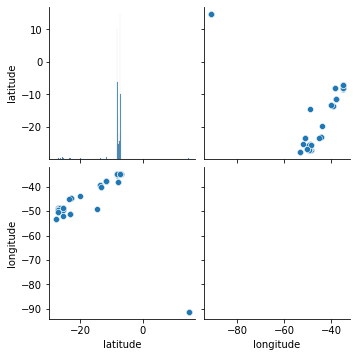

In [80]:
sns.pairplot(df_problema_17[['latitude','longitude']])

In [81]:
list_index = df_problema_17.index.to_list()

In [82]:
# Lista contendo todos indexes que preservam a identidade do df original, desta forma será utilizado para recuperação do dataset.

len(list_index)

4935

In [83]:
max(list_index)

204126

In [84]:
df.shape

(635853, 36)

In [85]:
for index in list_index:
    df['latitude'][index] = df_problema_17['latitude'][index]
    df['longitude'][index] = df_problema_17['longitude'][index]

<ipython-input-85-7655777697d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['latitude'][index] = df_problema_17['latitude'][index]
<ipython-input-85-7655777697d8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['longitude'][index] = df_problema_17['longitude'][index]


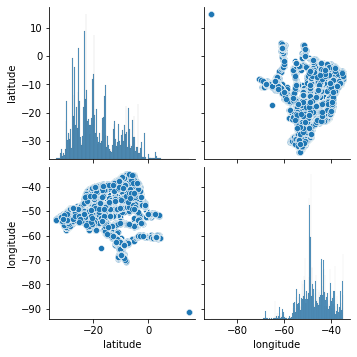

In [86]:
sns.pairplot(df[['latitude','longitude']])

In [87]:
df['latitude'].max()

14.8005458

In [88]:
df.loc[df['latitude']==14.8005458,['latitude','longitude']]=np.nan 

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

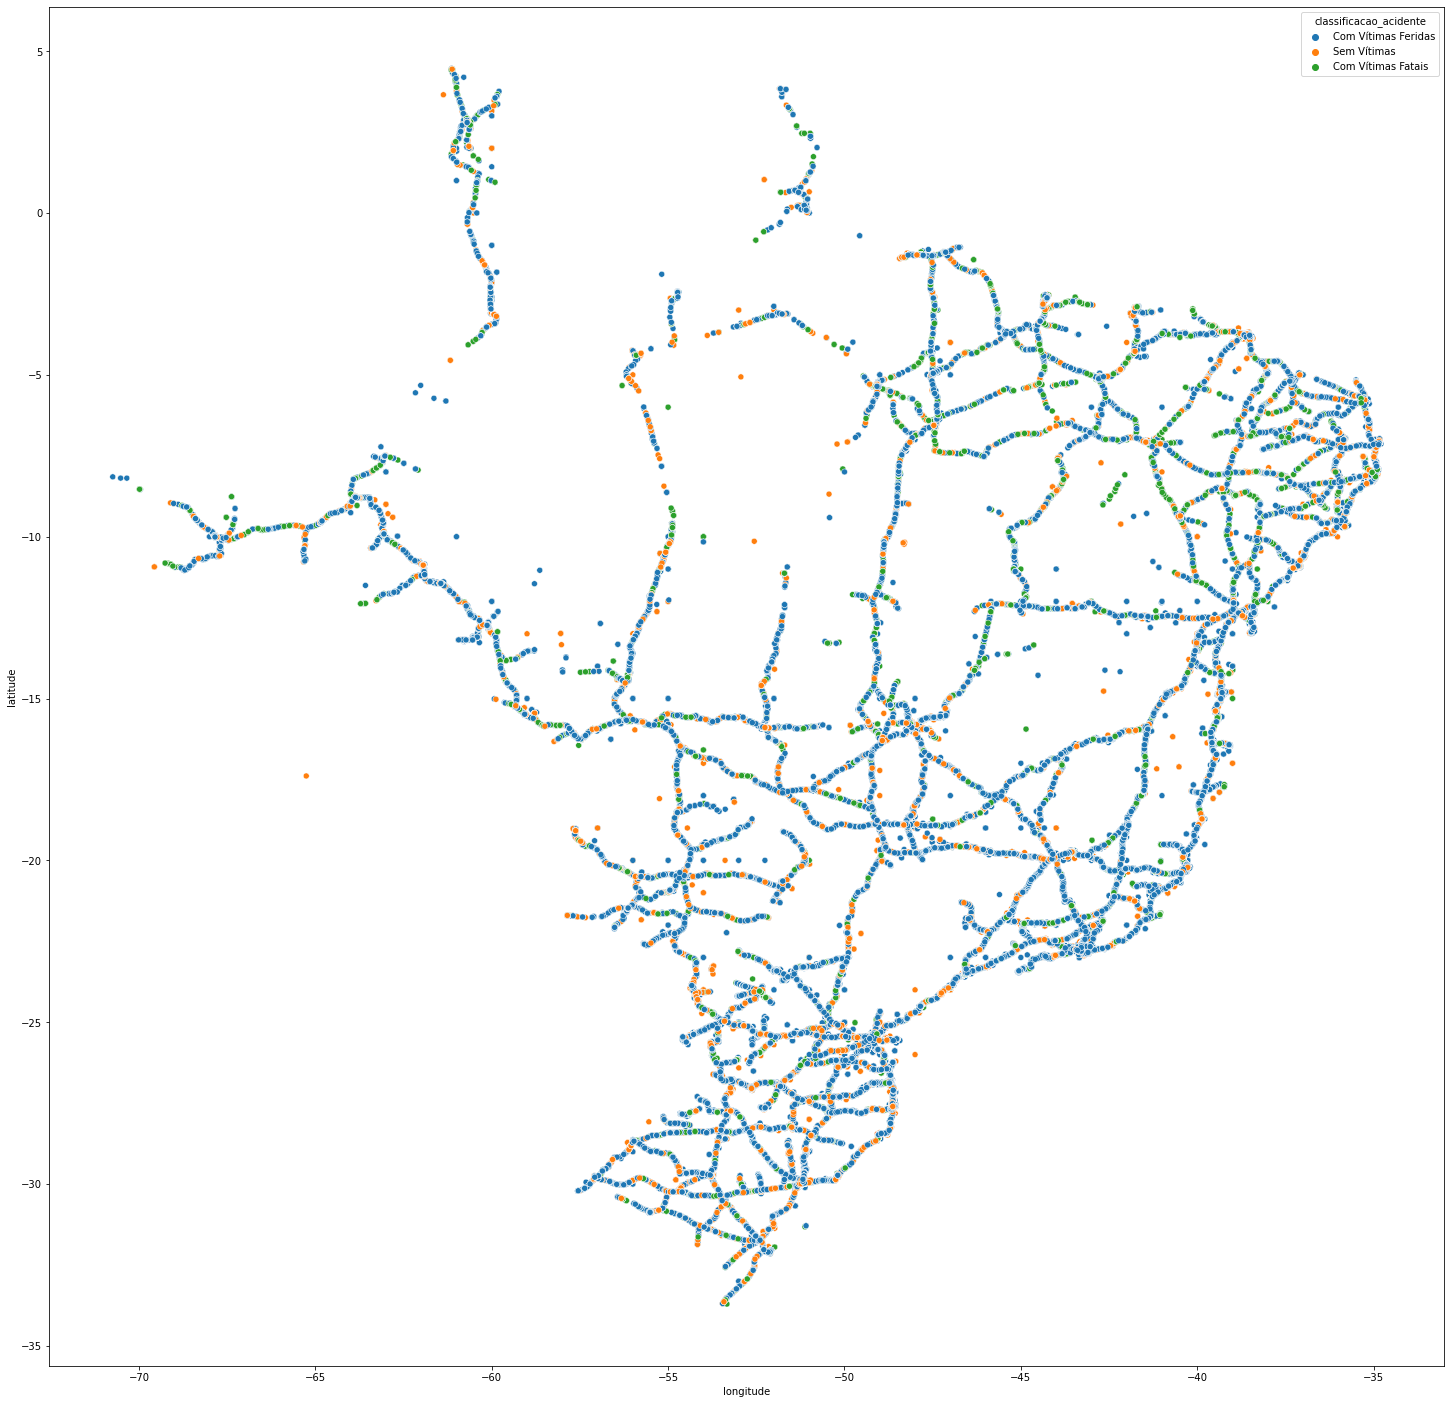

In [89]:
plt.figure(figsize=(25,25))
sns.scatterplot(x=df['longitude'],y=df['latitude'],hue=df['classificacao_acidente'])

In [90]:
df[(df['longitude']<-63)&(df['latitude']<-16)]=np.nan

Possível Observar 2 outliners ainda

In [91]:
df.isnull().sum()

id                            1
pesid                         5
data_inversa                  1
dia_semana                    1
horario                       1
uf                            1
br                         1088
km                         1088
municipio                     1
causa_acidente                1
tipo_acidente                 1
classificacao_acidente        1
fase_dia                      1
sentido_via                   1
condicao_metereologica        1
tipo_pista                    1
tracado_via                   1
uso_solo                      1
id_veiculo                    5
tipo_veiculo                  1
marca                     31078
ano_fabricacao_veiculo    36486
tipo_envolvido                1
estado_fisico                 1
idade                     58939
sexo                          1
ilesos                        1
feridos_leves                 1
feridos_graves                1
mortos                        1
latitude                   2190
longitud

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

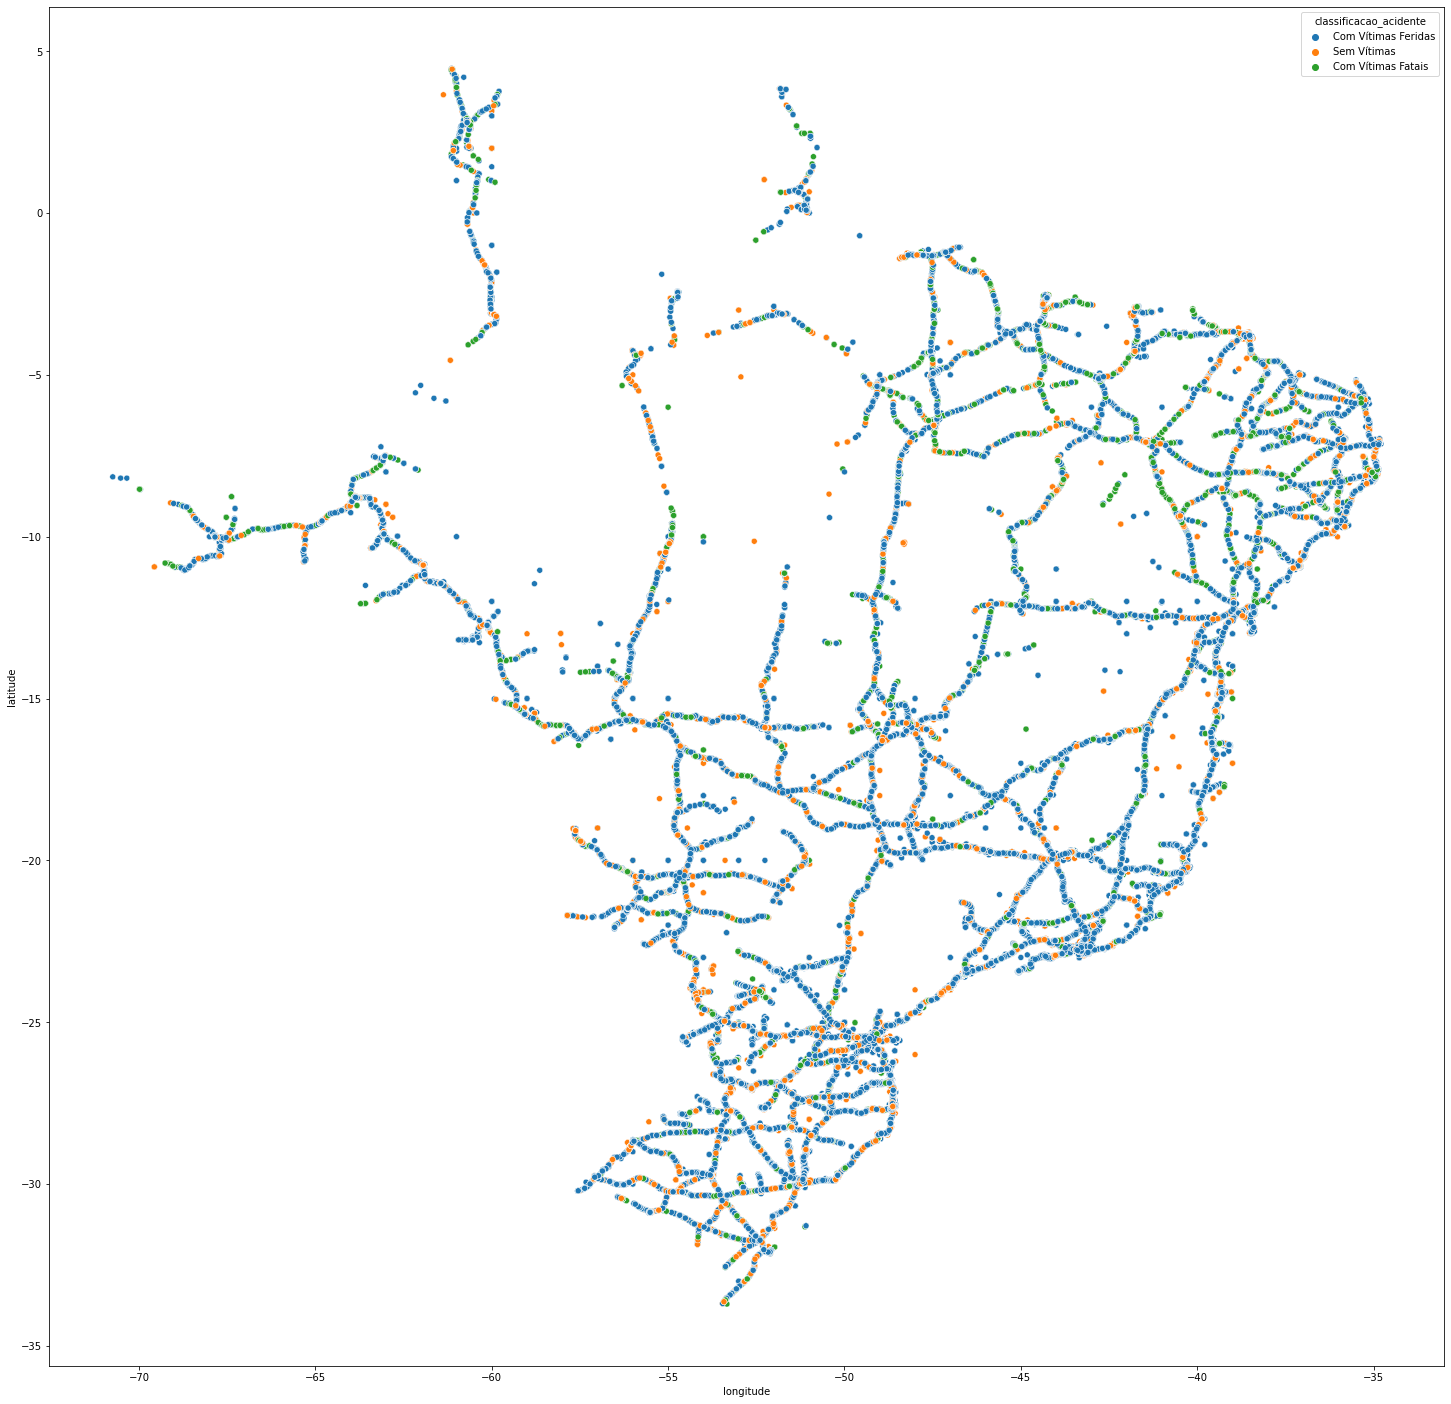

In [92]:
plt.figure(figsize=(25,25))
sns.scatterplot(x=df['longitude'],y=df['latitude'],hue=df['classificacao_acidente'])

## Valores nulos

Para os valores que permanceram nulos apesar do uso do geopy será necessário retirar do dataset uma vez que existe erros nos dados registrados e não só no latilon

In [95]:
df.isnull().sum()

id                            0
pesid                         4
data_inversa                  0
dia_semana                    0
horario                       0
uf                            0
br                         1083
km                         1083
municipio                     0
causa_acidente                0
tipo_acidente                 0
classificacao_acidente        0
fase_dia                      0
sentido_via                   0
condicao_metereologica        0
tipo_pista                    0
tracado_via                   0
uso_solo                      0
id_veiculo                    4
tipo_veiculo                  0
marca                     30885
ano_fabricacao_veiculo    36269
tipo_envolvido                0
estado_fisico                 0
idade                     58641
sexo                          0
ilesos                        0
feridos_leves                 0
feridos_graves                0
mortos                        0
latitude                      0
longitud

In [94]:
df.dropna(subset=['latitude','longitude'],inplace=True)

In [98]:
df.tail(5)

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,...,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop,ano
635848,314039.0,697176.0,2020-08-29,sábado,12:33:00,SC,101.0,208.6,SAO JOSE,Falta de Atenção à Condução,...,1.0,0.0,0.0,0.0,-27.60328,-48.632018,SR-SC,UOP01,DEL01,2020.0
635849,314039.0,697175.0,2020-08-29,sábado,12:33:00,SC,101.0,208.6,SAO JOSE,Falta de Atenção à Condução,...,1.0,0.0,0.0,0.0,-27.60328,-48.632018,SR-SC,UOP01,DEL01,2020.0
635850,314039.0,697174.0,2020-08-29,sábado,12:33:00,SC,101.0,208.6,SAO JOSE,Falta de Atenção à Condução,...,1.0,0.0,0.0,0.0,-27.60328,-48.632018,SR-SC,UOP01,DEL01,2020.0
635851,314162.0,697436.0,2020-05-28,quinta-feira,10:40:00,BA,101.0,249.0,CONCEICAO DO ALMEIDA,Defeito Mecânico no Veículo,...,0.0,1.0,0.0,0.0,-12.80860,-39.199200,SR-BA,UOP02,DEL01,2020.0
635852,314162.0,697434.0,2020-05-28,quinta-feira,10:40:00,BA,101.0,249.0,CONCEICAO DO ALMEIDA,Defeito Mecânico no Veículo,...,0.0,0.0,1.0,0.0,-12.80860,-39.199200,SR-BA,UOP02,DEL01,2020.0


In [101]:
df.to_csv('df_17_20_v02.csv',index=False)

In [102]:
'''id                         0
pesid                         4
data_inversa                  0
dia_semana                    0
horario                       0
uf                            0
br                         1083
km                         1083
municipio                     0
causa_acidente                0
tipo_acidente                 0
classificacao_acidente        0
fase_dia                      0
sentido_via                   0
condicao_metereologica        0
tipo_pista                    0
tracado_via                   0
uso_solo                      0
id_veiculo                    4
tipo_veiculo                  0
marca                     30885
ano_fabricacao_veiculo    36269
tipo_envolvido                0
estado_fisico                 0
idade                     58641
sexo                          0
ilesos                        0
feridos_leves                 0
feridos_graves                0
mortos                        0
latitude                      0 - > tratados e corrigidos, valores inconsistentes removidos
longitude                     0 - > tratados e corrigidos, valores inconsistentes removidos
regional                      0
delegacia                     0
uop                       27830
ano                           0'''

'id                         0\npesid                         4\ndata_inversa                  0\ndia_semana                    0\nhorario                       0\nuf                            0\nbr                         1083\nkm                         1083\nmunicipio                     0\ncausa_acidente                0\ntipo_acidente                 0\nclassificacao_acidente        0\nfase_dia                      0\nsentido_via                   0\ncondicao_metereologica        0\ntipo_pista                    0\ntracado_via                   0\nuso_solo                      0\nid_veiculo                    4\ntipo_veiculo                  0\nmarca                     30885\nano_fabricacao_veiculo    36269\ntipo_envolvido                0\nestado_fisico                 0\nidade                     58641\nsexo                          0\nilesos                        0\nferidos_leves                 0\nferidos_graves                0\nmortos                        0\nlatitude    